<a href="https://colab.research.google.com/github/hecshzye/object-detection-tfjs/blob/main/redone-freezing_graph_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Realtime Detection using TensorFlow**

## **Objective**

  - To construct a Computer Vision algorithm using TensorFlow and TensorFlow Js to recognise the connector inside a machinery (🚘)

  - Build a web application where the TensorFlow Js model is running inference over the live webcam.

## **Tools**

  - TensorFlow Training Custom Object Detector API
    - https://github.com/tensorflow/models/tree/master/research/object_detection

  - TFOD API Pretrained Model: ssd_mobilenet_v2 fpnlite 320x320
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md#:~:text=SSD%20MobileNet%20V2%20FPNLite%20320x320


  - Dataset labelled using LabelImg
    - https://github.com/tzutalin/labelImg 

In [64]:
# Connect Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Libraries 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Tensorflow js for inference

#!pip install tensorflowjs

     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 462 kB 36.6 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import sklearn
import cv2
import argparse
from google.colab.patches import cv2_imshow

In [ ]:
# In case of version issues

#!pip install tensorflow-gpu
#pip uninstall opencv-python-headless==4.5.5.62
#pip install opencv-python-headless==4.5.2.52
#!pip install tensorflow==2.7.0
#!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
# Check GPU Availability 

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [ ]:
# GPU 

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-786aaedc-3ea7-502c-3b51-1f6391614e02)


### Clone Tensorflow Object Detection Models

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 72017, done.
remote: Total 72017 (delta 0), reused 0 (delta 0), pack-reused 72017
Receiving objects: 100% (72017/72017), 578.92 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (50951/50951), done.


####From the TFOD Official Documentation, installing protobuf inside the TFOD research folder


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
# Install protobuf

!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# Install COCO API 

!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 24.65 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

###Install TensorFlow Object Detection API

In [ ]:
cd ..

/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
# Install

!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.2 MB 21.3 MB/s 
     |████████████████████████████████| 352 kB 72.1 MB/s 
     |████████████████████████████████| 2.2 MB 52.2 MB/s 
     |████████████████████████████████| 23.4 MB 1.4 MB/s 
     |████████████████████████████████| 237 kB 76.8 MB/s 
     |████████████████████████████████| 47.8 MB 44 kB/s 
     |████████████████████████████████| 4.9 MB 51.2 MB/s 
     |████████████████████████████████| 90 kB 11.6 MB/s 
     |████████████████████████████████| 636 kB 70.2 MB/s 
     |████████████████████████████████| 99 kB 1

In [ ]:
# Check Tensorflow version 

print(tf.__version__)

2.8.0


###Test run the TFOD API

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-21 11:36:05.961957: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0421 11:36:06.215100 139735367100288 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.43s
I0421 11:36:06.574267 139735367100288 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.43s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.52s
I0421 11:36:07.098807 139735367100288 test

###Download pre-trained model: SSD MobileNet V2 FPNLite 320x320

In [ ]:
cd /content/fabrik_tfod_demo/pre-trained-models

/content/fabrik_tfod_demo/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-04-21 11:37:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  52.6MB/s    in 0.4s    

2022-04-21 11:37:02 (52.6 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’ saved [20515344/20515344]



In [ ]:
# Unzip the Pretrained Model

!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


###Create TF Records

In [ ]:
cd /content/fabrik_tfod_demo

/content/fabrik_tfod_demo


**Create Train & Test TF Records**

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/fabrik_tfod_demo/images/train -l /content/fabrik_tfod_demo/annotations/label_map.pbtxt -o /content/fabrik_tfod_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/fabrik_tfod_demo/images/test -l /content/fabrik_tfod_demo/annotations/label_map.pbtxt -o /content/fabrik_tfod_demo/annotations/test.record

Successfully created the TFRecord file: /content/fabrik_tfod_demo/annotations/train.record
Successfully created the TFRecord file: /content/fabrik_tfod_demo/annotations/test.record


###Train the Model

In [79]:
# Confirming GPU for training

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


**To resolve the OpenCV version conflict**

In [ ]:
#pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
#pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 1.3 MB/s 


In [ ]:
# Train

!python model_main_tf2.py --model_dir=/content/fabrik_tfod_demo/models/my_ssd_mobilenet_v2_fpnlite --pipeline_config_path=/content/fabrik_tfod_demo/models/my_ssd_mobilenet_v2_fpnlite/pipeline.config

2022-04-21 11:49:03.815003: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0421 11:49:03.847517 140381122615168 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0421 11:49:03.869364 140381122615168 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0421 11:49:03.869562 140381122615168 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0421 11:49:04.187926 140381122615168 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

In [ ]:
import cv2 
import numpy as np

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

###Export Model

In [73]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/fabrik_tfod_demo/models/my_ssd_mobilenet_v2_fpnlite/pipeline.config --trained_checkpoint_dir /content/fabrik_tfod_demo/models/my_ssd_mobilenet_v2_fpnlite --output_directory /content/fabrik_tfod_demo/exported_models/my_model

2022-04-21 13:11:01.694209: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0421 13:11:01.835019 139819923027840 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-04-21 13:11:17.020657: W ten

###Run Inference

Loading model...Done! Took 10.767712116241455 seconds
Running inference for /content/fabrik_tfod_demo/images/train/connector137.jpg... Done


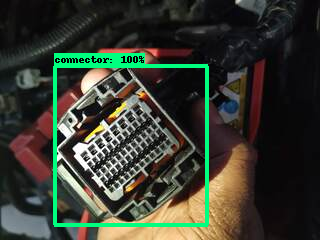

In [82]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation


# PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/fabrik_tfod_demo/images/train/connector137.jpg'


# PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/fabrik_tfod_demo/exported_models/my_model'

# PATH TO LABEL MAP
PATH_TO_LABELS = '/content/fabrik_tfod_demo/annotations/label_map.pbtxt'

# MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image #from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array #with shape
    (height, width, channels), where #channels=3 #for RGB.
    Args:
      path: the #file path to the image
    Returns:
      uint8 numpy array #with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)

In [149]:
#cd /content/fabrik_tfod_demo

In [ ]:
#pwd

'/content/fabrik_tfod_demo'

### Convert to Tensorflow Js 

In [156]:
cd /content/fabrik_tfod_demo/exported_models/my_model

/content/fabrik_tfod_demo/exported_models/my_model


In [162]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 5.5 MB/s 


In [165]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model --signature_name=serving_default --saved_model_tags=serve /content/fabrik_tfod_demo/exported_models/my_model/saved_model /content/fabrik_tfod_demo/exported_models/my_model/saved_model/web_model



2022-04-21 15:01:16.648627: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Writing weight file /content/fabrik_tfod_demo/exported_models/my_model/saved_model/web_model/model.json...


In [ ]:
#cd /content/fabrik_tfod_demo/exported_models/my_model/my_model/web_model

/content/fabrik_tfod_demo/exported_models/my_model/my_model/web_model


In [ ]:
#cd /content/fabrik_tfod_demo

/content/fabrik_tfod_demo


**Tensorflow js format successfully generated**